<a href="https://colab.research.google.com/github/ParthAmin15/cab-fare-prediction/blob/main/cab_fare_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd # Importing pandas for performing EDA
import numpy as np  # Importing numpy for Linear Algebric operations
import matplotlib.pyplot as plt # Importing for Data Visualization
import seaborn as sns # Importing for Data Visualization
from collections import Counter
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

#Machine Learning algorithm
from sklearn.linear_model import LinearRegression

# For splitting dataset
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from pprint import pprint
from sklearn.model_selection import GridSearchCV

%matplotlib inline

In [4]:
train  = pd.read_csv("/content/train_cab_fare.csv",na_values={"pickup_datetime":"43"})
test   = pd.read_csv("/content/test_cab_fare.csv")

In [6]:
train.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1.0


In [5]:
train.tail()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
16062,6.5,2014-12-12 07:41:00 UTC,-74.008820,40.718757,-73.998865,40.719987,1.0
16063,16.1,2009-07-13 07:58:00 UTC,-73.981310,40.781695,-74.014392,40.715527,2.0
16064,8.5,2009-11-11 11:19:07 UTC,-73.972507,40.753417,-73.979577,40.765495,1.0
16065,8.1,2010-05-11 23:53:00 UTC,-73.957027,40.765945,-73.981983,40.779560,1.0
16066,8.5,2011-12-14 06:24:33 UTC,-74.002111,40.729755,-73.983877,40.761975,NaN


In [6]:
test.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1


In [7]:
test.tail()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
9909,2015-05-10 12:37:51 UTC,-73.968124,40.796997,-73.955643,40.780388,6
9910,2015-01-12 17:05:51 UTC,-73.945511,40.803600,-73.960213,40.776371,6
9911,2015-04-19 20:44:15 UTC,-73.991600,40.726608,-73.789742,40.647011,6
9912,2015-01-31 01:05:19 UTC,-73.985573,40.735432,-73.939178,40.801731,6
9913,2015-01-18 14:06:23 UTC,-73.988022,40.754070,-74.000282,40.759220,6


In [8]:
train.shape

(16067, 7)

In [9]:
test.shape

(9914, 6)

In [10]:
train.dtypes

,0
fare_amount,object
pickup_datetime,object
pickup_longitude,float64
pickup_latitude,float64
dropoff_longitude,float64
dropoff_latitude,float64
passenger_count,float64


In [11]:
test.dtypes

,0
pickup_datetime,object
pickup_longitude,float64
pickup_latitude,float64
dropoff_longitude,float64
dropoff_latitude,float64
passenger_count,int64


In [12]:
train.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,16067.000000,16067.000000,16067.000000,16067.000000,16012.000000
mean,-72.462787,39.914725,-72.462328,39.897906,2.625070
std,10.578384,6.826587,10.575062,6.187087,60.844122
min,-74.438233,-74.006893,-74.429332,-74.006377,0.000000
25%,-73.992156,40.734927,-73.991182,40.734651,1.000000
50%,-73.981698,40.752603,-73.980172,40.753567,1.000000
75%,-73.966838,40.767381,-73.963642,40.768014,2.000000
max,40.766125,401.083332,40.802437,41.366138,5345.000000


In [13]:
test.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974722,40.751041,-73.973657,40.751743,1.671273
std,0.042774,0.033541,0.039072,0.035435,1.278747
min,-74.252193,40.573143,-74.263242,40.568973,1.000000
25%,-73.992501,40.736125,-73.991247,40.735254,1.000000
50%,-73.982326,40.753051,-73.980015,40.754065,1.000000
75%,-73.968013,40.767113,-73.964059,40.768757,2.000000
max,-72.986532,41.709555,-72.990963,41.696683,6.000000


In [14]:
train["fare_amount"] = pd.to_numeric(train["fare_amount"],errors = "coerce")

In [15]:
train.dtypes

,0
fare_amount,float64
pickup_datetime,object
pickup_longitude,float64
pickup_latitude,float64
dropoff_longitude,float64
dropoff_latitude,float64
passenger_count,float64


In [16]:
train.shape

(16067, 7)

In [17]:
train.dropna(subset=["pickup_datetime"])

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1.0
...,...,...,...,...,...,...,...
16062,6.5,2014-12-12 07:41:00 UTC,-74.008820,40.718757,-73.998865,40.719987,1.0
16063,16.1,2009-07-13 07:58:00 UTC,-73.981310,40.781695,-74.014392,40.715527,2.0
16064,8.5,2009-11-11 11:19:07 UTC,-73.972507,40.753417,-73.979577,40.765495,1.0
16065,8.1,2010-05-11 23:53:00 UTC,-73.957027,40.765945,-73.981983,40.779560,1.0


In [18]:
train['pickup_datetime'] =  pd.to_datetime(train['pickup_datetime'], format='%Y-%m-%d %H:%M:%S UTC')

In [19]:
train['Year'] = train['pickup_datetime'].dt.year
train['Month'] = train['pickup_datetime'].dt.month
train['Date'] = train['pickup_datetime'].dt.day
train['Day'] = train['pickup_datetime'].dt.dayofweek
train['Hour'] = train['pickup_datetime'].dt.hour
train['Minute'] = train['pickup_datetime'].dt.minute

In [20]:
train.dtypes

,0
fare_amount,float64
pickup_datetime,datetime64[ns]
pickup_longitude,float64
pickup_latitude,float64
dropoff_longitude,float64
dropoff_latitude,float64
passenger_count,float64
Year,float64
Month,float64
Date,float64


In [21]:
test["pickup_datetime"]=pd.to_datetime(test["pickup_datetime"],format="%Y-%m-%d %H:%M:%S UTC")

In [22]:
test['Year']=test['pickup_datetime'].dt.year
test['Month']=test['pickup_datetime'].dt.month
test['Date']=test['pickup_datetime'].dt.day
test['Day']=test['pickup_datetime'].dt.dayofweek
test['Hour']=test['pickup_datetime'].dt.hour
test['Minute']=test['pickup_datetime'].dt.minute

In [23]:
test.dtypes

,0
pickup_datetime,datetime64[ns]
pickup_longitude,float64
pickup_latitude,float64
dropoff_longitude,float64
dropoff_latitude,float64
passenger_count,int64
Year,int32
Month,int32
Date,int32
Day,int32


In [24]:
train = train.drop(train[train['pickup_datetime'].isnull()].index, axis=0)
print(train.shape)
print(train['pickup_datetime'].isnull().sum())

(16066, 13)
0


In [25]:
train['passenger_count'].describe()

,passenger_count
count,16011.000000
mean,2.625171
std,60.846021
min,0.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,5345.000000


In [26]:
train = train.drop(train[train["passenger_count"]> 6 ].index, axis=0)

In [29]:
train = train.drop(train[train["passenger_count"] == 0 ].index, axis=0)

In [27]:
train["passenger_count"].describe()

,passenger_count
count,15991.000000
mean,1.643701
std,1.267504
min,0.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,6.000000


In [28]:
train["passenger_count"].sort_values(ascending=True)

,passenger_count
5277,0.0
7279,0.0
6036,0.0
13379,0.0
4354,0.0
...,...
8076,NaN
8139,NaN
8259,NaN
8306,NaN


In [29]:
train = train.drop(train[train['passenger_count'].isnull()].index, axis=0)
print(train.shape)
print(train['passenger_count'].isnull().sum())

(15991, 13)
0


In [30]:
train=train.drop(train[train['passenger_count']==0.12].index, axis=0)

In [34]:
train.shape

(15933, 13)

In [31]:
train["fare_amount"].sort_values(ascending=False)

,fare_amount
1015,54343.0
1072,4343.0
607,453.0
980,434.0
1335,180.0
...,...
1712,NaN
2412,NaN
2458,NaN
8178,NaN


In [32]:
Counter(train["fare_amount"]<0)
Counter({False: 15930, True: 3})

Counter({False: 15930, True: 3})

In [33]:
train=train.drop(train[train['fare_amount']<0].index, axis=0)
print(train.shape)

(15987, 13)


In [34]:
train["fare_amount"].min()

0.0

In [35]:
train=train.drop(train[train['fare_amount']<1].index,axis=0)
train.shape

(15985, 13)

In [36]:
train['fare_amount'].sort_values(ascending=False)

,fare_amount
1015,54343.0
1072,4343.0
607,453.0
980,434.0
1335,180.0
...,...
1712,NaN
2412,NaN
2458,NaN
8178,NaN


In [37]:
train=train.drop(train[train["fare_amount"].isnull()].index, axis=0)
train.shape

(15961, 13)

In [38]:
train=train.drop(train[train["fare_amount"]>453].index, axis=0)
train.shape

(15959, 13)

In [39]:
train['fare_amount'].sort_values(ascending=False)

,fare_amount
607,453.00
980,434.00
1335,180.00
1483,165.00
6630,128.83
...,...
14633,2.50
1774,2.50
1750,2.50
6703,2.50


In [40]:
train['fare_amount'].describe()

,fare_amount
count,15959.000000
mean,11.368808
std,10.802208
min,1.140000
25%,6.000000
50%,8.500000
75%,12.500000
max,453.000000


In [41]:
train[train['pickup_latitude']<-90]
train[train['pickup_latitude']>90]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Date,Day,Hour,Minute
5686,3.3,2011-07-30 11:15:00,-73.947235,401.083332,-73.951392,40.778927,1.0,2011.0,7.0,30.0,5.0,11.0,15.0


In [42]:
train = train.drop((train[train['pickup_latitude']<-90]).index, axis=0)
train = train.drop((train[train['pickup_latitude']>90]).index, axis=0)

In [43]:
train['pickup_latitude'].sort_values(ascending=False)

,pickup_latitude
10688,41.366138
7043,41.366138
14367,41.366138
4487,41.366138
1684,41.366138
...,...
3827,-73.988467
4783,-73.991840
9548,-73.992947
10091,-74.006210


In [44]:
train[train['pickup_longitude']<-180]
train[train['pickup_longitude']>180]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Date,Day,Hour,Minute


In [45]:
train.shape

(15958, 13)

In [46]:
train.isnull().sum()

,0
fare_amount,0
pickup_datetime,0
pickup_longitude,0
pickup_latitude,0
dropoff_longitude,0
dropoff_latitude,0
passenger_count,0
Year,0
Month,0
Date,0


In [47]:
test.isnull().sum()

,0
pickup_datetime,0
pickup_longitude,0
pickup_latitude,0
dropoff_longitude,0
dropoff_latitude,0
passenger_count,0
Year,0
Month,0
Date,0
Day,0


In [48]:
from math import radians, cos, sin, asin, sqrt
def haversine(a):
    lon1=a[0]
    lat1=a[1]
    lon2=a[2]
    lat2=a[3]

    # Convert decimal degrees to radians
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c =  2 * asin(sqrt(a))

    # Radius of earth in kilometers is 6371
    km = 6371* c
    return km

In [49]:
train['distance'] = train[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']].apply(haversine,axis=1)

<ipython-input-48-5ebd8a2471b6>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  lon1=a[0]
<ipython-input-48-5ebd8a2471b6>:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  lat1=a[1]
<ipython-input-48-5ebd8a2471b6>:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  lon2=a[2]
<ipython-input-48-5ebd8a2471b6>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be tre

In [50]:
test['distance'] = test[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']].apply(haversine,axis=1)

<ipython-input-48-5ebd8a2471b6>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  lon1=a[0]
<ipython-input-48-5ebd8a2471b6>:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  lat1=a[1]
<ipython-input-48-5ebd8a2471b6>:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  lon2=a[2]
<ipython-input-48-5ebd8a2471b6>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be tre

In [51]:
train.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Date,Day,Hour,Minute,distance
0,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1.0,2009.0,6.0,15.0,0.0,17.0,26.0,1.030764
1,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1.0,2010.0,1.0,5.0,1.0,16.0,52.0,8.450134
2,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2.0,2011.0,8.0,18.0,3.0,0.0,35.0,1.389525
3,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1.0,2012.0,4.0,21.0,5.0,4.0,30.0,2.799270
4,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1.0,2010.0,3.0,9.0,1.0,7.0,51.0,1.999157


In [52]:
test.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Date,Day,Hour,Minute,distance
0,2015-01-27 13:08:24,-73.973320,40.763805,-73.981430,40.743835,1,2015,1,27,1,13,8,2.323259
1,2015-01-27 13:08:24,-73.986862,40.719383,-73.998886,40.739201,1,2015,1,27,1,13,8,2.425353
2,2011-10-08 11:53:44,-73.982524,40.751260,-73.979654,40.746139,1,2011,10,8,5,11,53,0.618628
3,2012-12-01 21:12:12,-73.981160,40.767807,-73.990448,40.751635,1,2012,12,1,5,21,12,1.961033
4,2012-12-01 21:12:12,-73.966046,40.789775,-73.988565,40.744427,1,2012,12,1,5,21,12,5.387301


In [53]:
train.nunique()

,0
fare_amount,459
pickup_datetime,15913
pickup_longitude,13704
pickup_latitude,14152
dropoff_longitude,13802
dropoff_latitude,14176
passenger_count,8
Year,7
Month,12
Date,31


In [54]:
test.nunique()

,0
pickup_datetime,1753
pickup_longitude,9124
pickup_latitude,9246
dropoff_longitude,9141
dropoff_latitude,9360
passenger_count,6
Year,7
Month,12
Date,31
Day,7


In [55]:
train['distance'].sort_values(ascending=False)

,distance
9147,8667.542104
8647,8667.497512
2397,8667.454421
472,8667.304968
15919,8666.989922
...,...
4365,0.000000
10901,0.000000
14145,0.000000
4298,0.000000


In [56]:
Counter(train['distance'] == 0)

Counter({False: 15503, True: 455})

In [57]:
Counter(test['distance']==0)


Counter({False: 9829, True: 85})

In [58]:
train = train.drop(train[train['distance']== 0].index, axis=0)
train.shape

(15503, 14)

In [59]:
train = train.drop(train[train['distance'] > 130 ].index, axis=0)
train.shape

(15478, 14)

In [60]:
train.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Date,Day,Hour,Minute,distance
0,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1.0,2009.0,6.0,15.0,0.0,17.0,26.0,1.030764
1,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1.0,2010.0,1.0,5.0,1.0,16.0,52.0,8.450134
2,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2.0,2011.0,8.0,18.0,3.0,0.0,35.0,1.389525
3,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1.0,2012.0,4.0,21.0,5.0,4.0,30.0,2.799270
4,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1.0,2010.0,3.0,9.0,1.0,7.0,51.0,1.999157


In [61]:
drop1 = ['pickup_datetime', 'pickup_longitude', 'pickup_latitude','dropoff_longitude', 'dropoff_latitude', 'Minute']

train = train.drop(drop1, axis = 1)

In [62]:
train.head()

,fare_amount,passenger_count,Year,Month,Date,Day,Hour,distance
0,4.5,1.0,2009.0,6.0,15.0,0.0,17.0,1.030764
1,16.9,1.0,2010.0,1.0,5.0,1.0,16.0,8.450134
2,5.7,2.0,2011.0,8.0,18.0,3.0,0.0,1.389525
3,7.7,1.0,2012.0,4.0,21.0,5.0,4.0,2.799270
4,5.3,1.0,2010.0,3.0,9.0,1.0,7.0,1.999157


In [63]:
train['passenger_count'] = train['passenger_count'].astype('int64')
train['Year'] = train['Year'].astype('int64')
train['Month'] = train['Month'].astype('int64')
train['Date'] = train['Date'].astype('int64')
train['Day'] = train['Day'].astype('int64')
train['Hour'] = train['Hour'].astype('int64')

In [64]:
train.dtypes

,0
fare_amount,float64
passenger_count,int64
Year,int64
Month,int64
Date,int64
Day,int64
Hour,int64
distance,float64


In [65]:
drop2 = ['pickup_datetime', 'pickup_longitude', 'pickup_latitude','dropoff_longitude', 'dropoff_latitude', 'Minute']

test = test.drop(drop2, axis = 1)
test.head()

,passenger_count,Year,Month,Date,Day,Hour,distance
0,1,2015,1,27,1,13,2.323259
1,1,2015,1,27,1,13,2.425353
2,1,2011,10,8,5,11,0.618628
3,1,2012,12,1,5,21,1.961033
4,1,2012,12,1,5,21,5.387301


In [66]:
test['passenger_count'] = test['passenger_count'].astype('int64')
test['Year'] = test['Year'].astype('int64')
test['Month'] = test['Month'].astype('int64')
test['Date'] = test['Date'].astype('int64')
test['Day'] = test['Day'].astype('int64')
test['Hour'] = test['Hour'].astype('int64')

In [67]:
test.dtypes

,0
passenger_count,int64
Year,int64
Month,int64
Date,int64
Day,int64
Hour,int64
distance,float64


<Axes: xlabel='passenger_count', ylabel='count'>

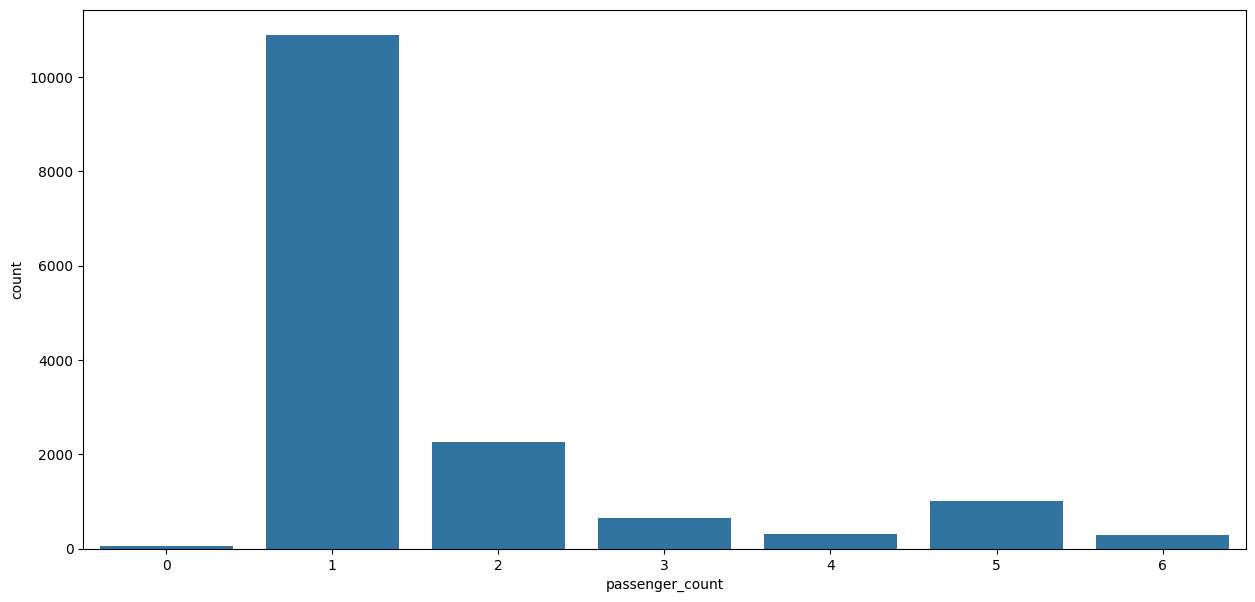

In [68]:
plt.figure(figsize=(15,7))
sns.countplot(x="passenger_count", data=train)

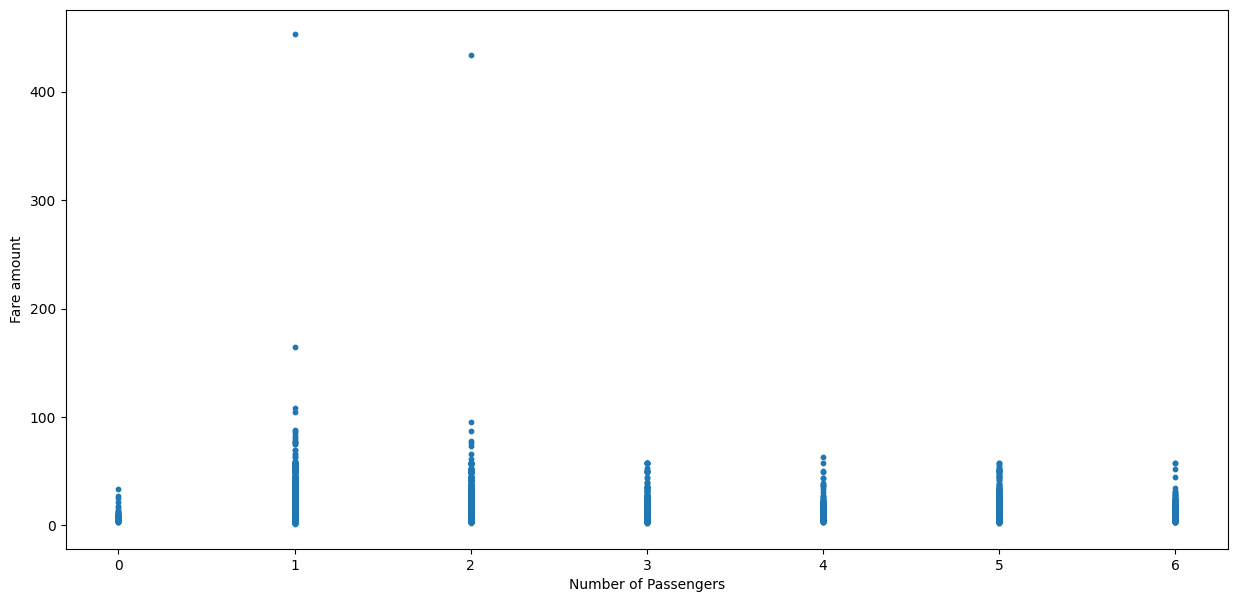

In [69]:
plt.figure(figsize=(15,7))
plt.scatter(x=train['passenger_count'], y=train['fare_amount'], s=10)
plt.xlabel('Number of Passengers')
plt.ylabel('Fare amount')
plt.show()

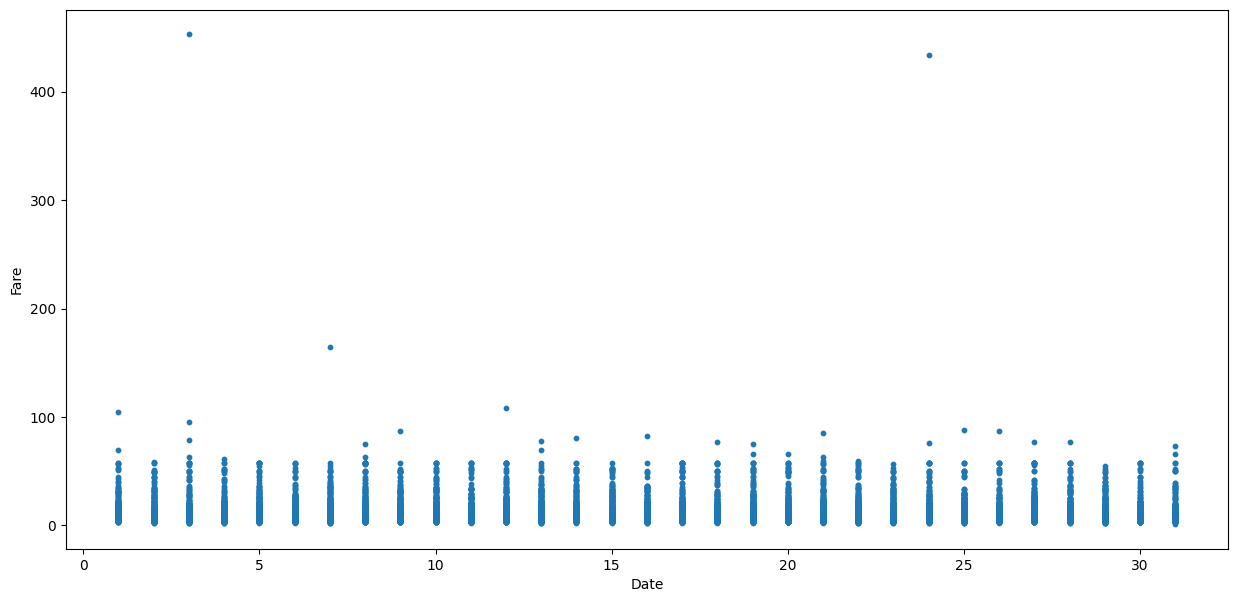

In [70]:
plt.figure(figsize=(15,7))
plt.scatter(x=train['Date'], y=train['fare_amount'], s=10)
plt.xlabel('Date')
plt.ylabel('Fare')
plt.show()

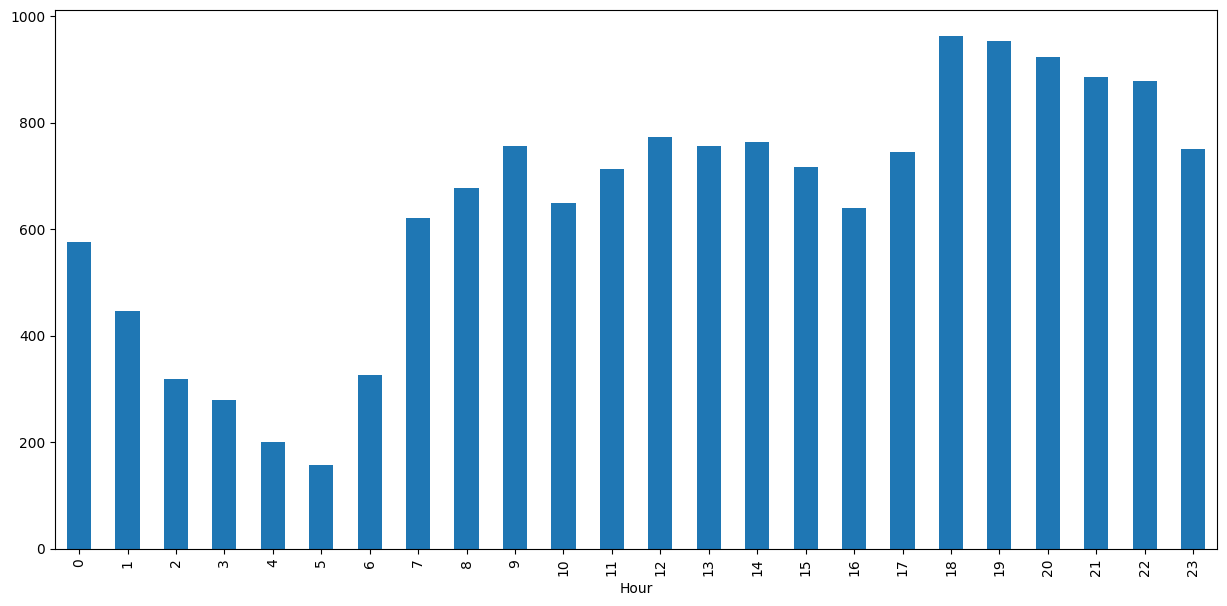

In [71]:
plt.figure(figsize=(15,7))
train.groupby(train["Hour"])['Hour'].count().plot(kind="bar")
plt.show()

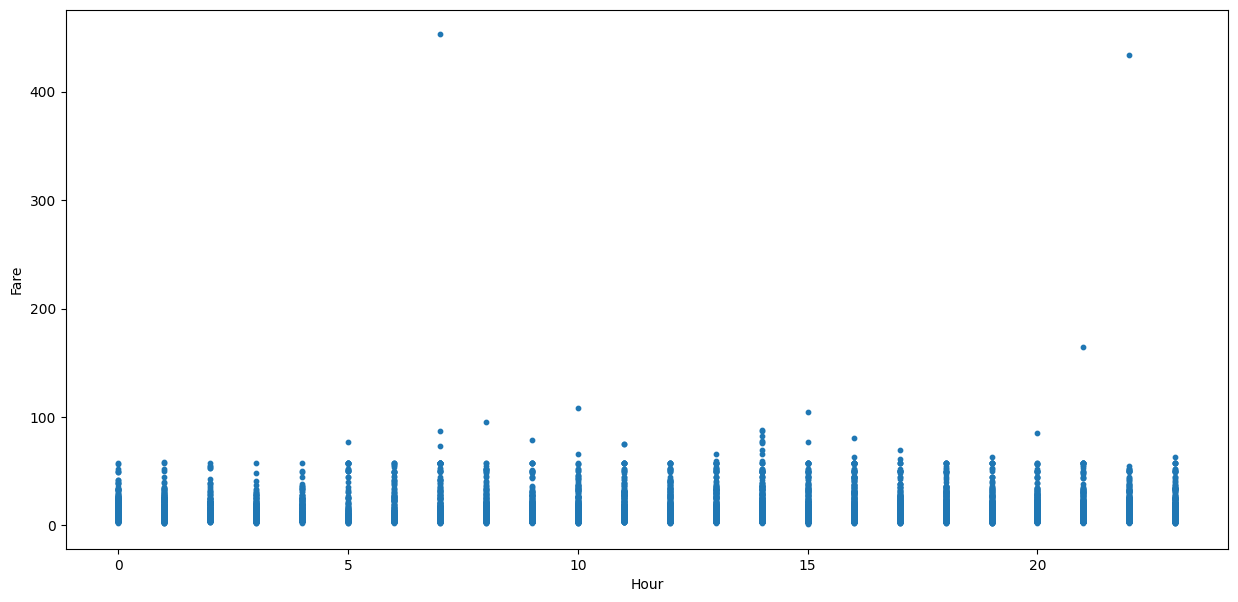

In [72]:
plt.figure(figsize=(15,7))
plt.scatter(x=train['Hour'], y=train['fare_amount'], s=10)
plt.xlabel('Hour')
plt.ylabel('Fare')
plt.show()


<Axes: xlabel='Day', ylabel='count'>

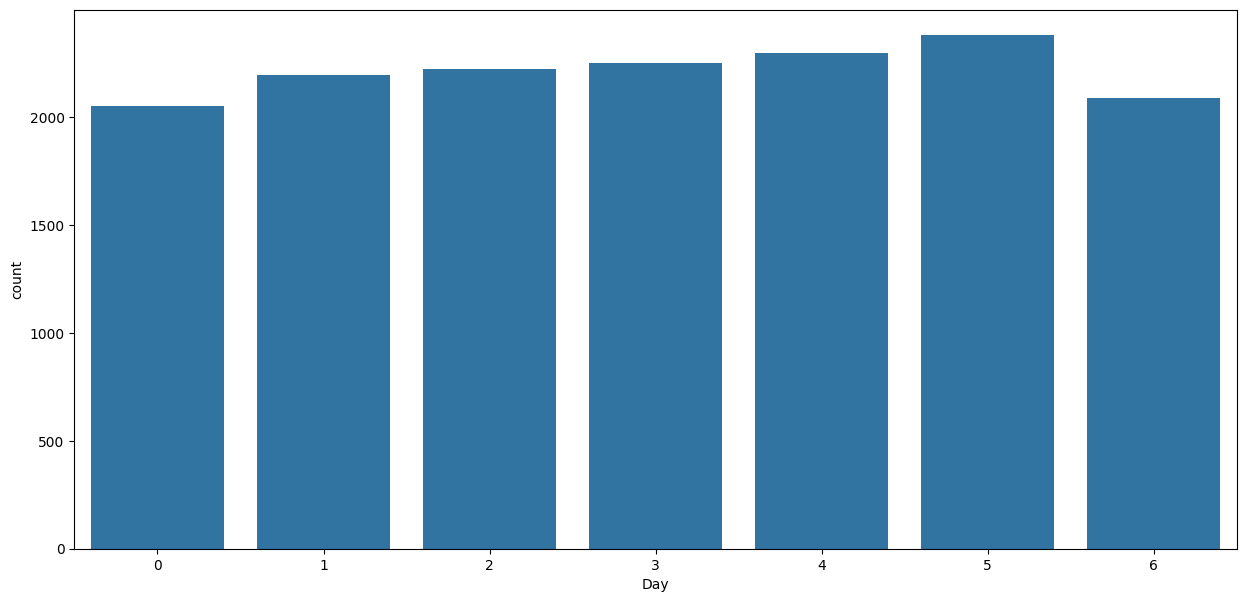

In [74]:
plt.figure(figsize=(15,7))
sns.countplot(x="Day", data=train)

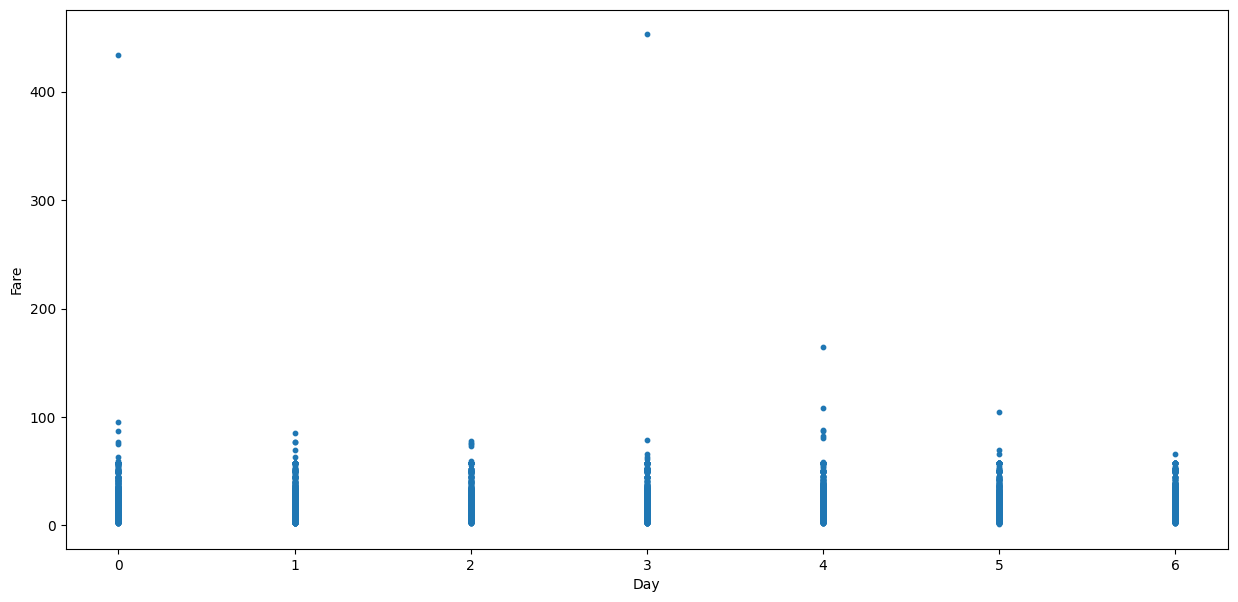

In [75]:
plt.figure(figsize=(15,7))
plt.scatter(x=train['Day'], y=train['fare_amount'], s=10)
plt.xlabel('Day')
plt.ylabel('Fare')
plt.show()

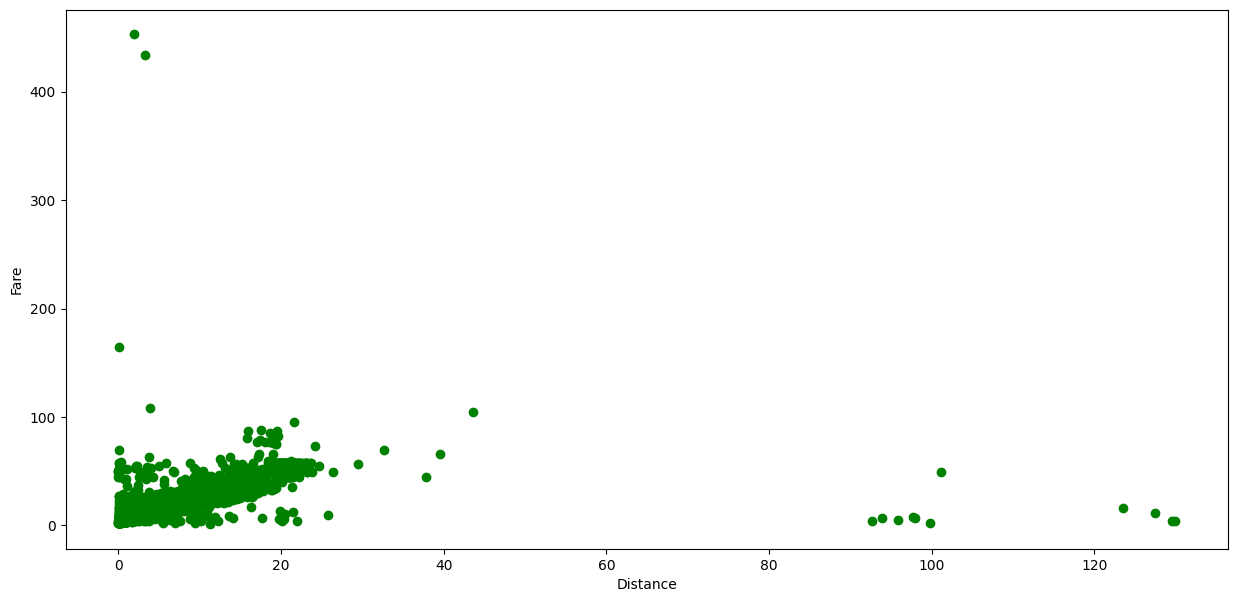

In [76]:
plt.figure(figsize=(15,7))
plt.scatter(x = train['distance'],y = train['fare_amount'],c = "g")
plt.xlabel('Distance')
plt.ylabel('Fare')
plt.show()

fare_amount


<ipython-input-77-b445808dea11>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train[i],bins='auto',color='green')


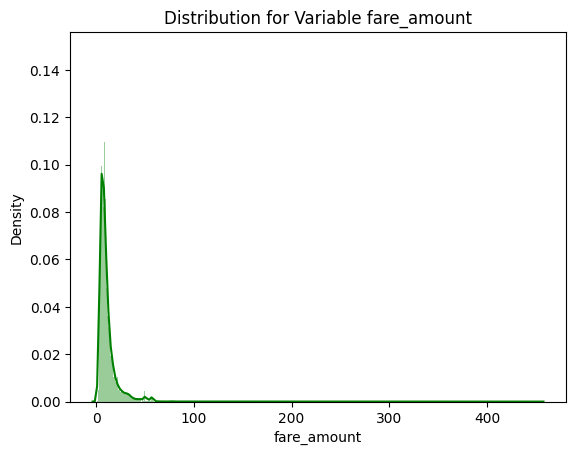

distance


<ipython-input-77-b445808dea11>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train[i],bins='auto',color='green')


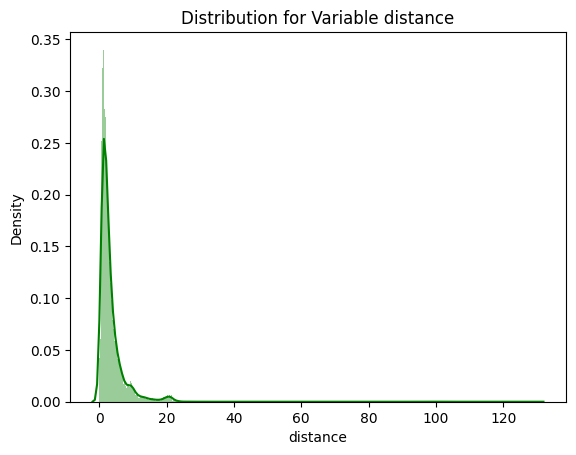

In [77]:
for i in ['fare_amount', 'distance']:
    print(i)
    sns.distplot(train[i],bins='auto',color='green')
    plt.title("Distribution for Variable "+i)
    plt.ylabel("Density")
    plt.show()

In [78]:
train['fare_amount'] = np.log1p(train['fare_amount'])

In [79]:
train['distance'] = np.log1p(train['distance'])

fare_amount


<ipython-input-80-b445808dea11>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train[i],bins='auto',color='green')


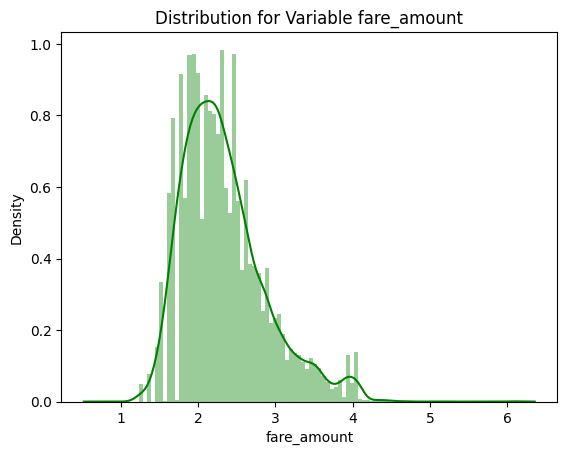

distance


<ipython-input-80-b445808dea11>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train[i],bins='auto',color='green')


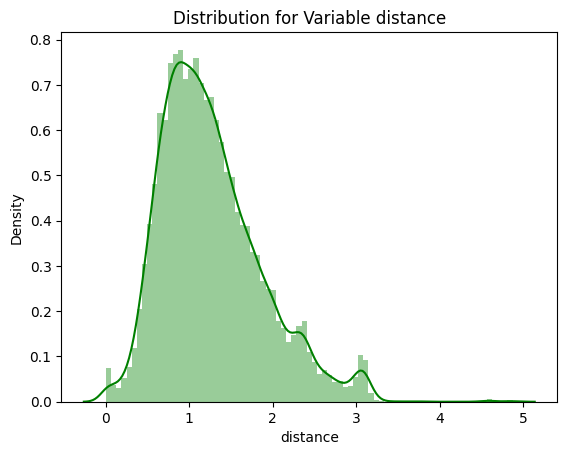

In [80]:
for i in ['fare_amount', 'distance']:
    print(i)
    sns.distplot(train[i],bins='auto',color='green')
    plt.title("Distribution for Variable "+i)
    plt.ylabel("Density")
    plt.show()

In [81]:
train['fare_amount'] = np.log1p(train['fare_amount'])

In [82]:
train['distance'] = np.log1p(train['distance'])

fare_amount


<ipython-input-84-b445808dea11>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train[i],bins='auto',color='green')


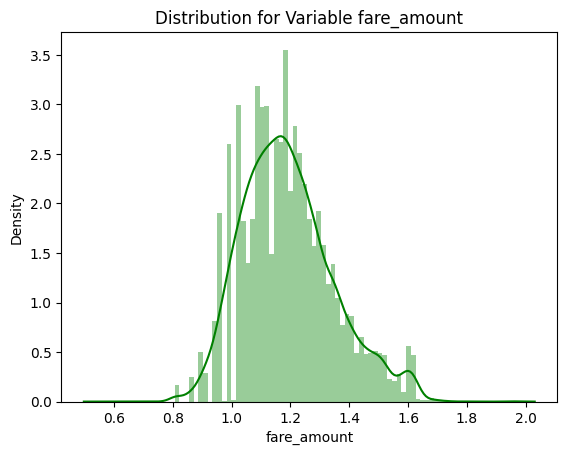

distance


<ipython-input-84-b445808dea11>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train[i],bins='auto',color='green')


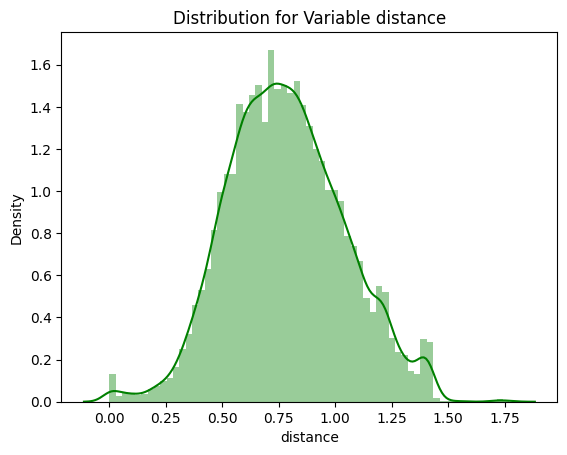

In [84]:
for i in ['fare_amount', 'distance']:
    print(i)
    sns.distplot(train[i],bins='auto',color='green')
    plt.title("Distribution for Variable "+i)
    plt.ylabel("Density")
    plt.show()

<ipython-input-85-866023d0f931>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(test['distance'],bins='auto',color='green')


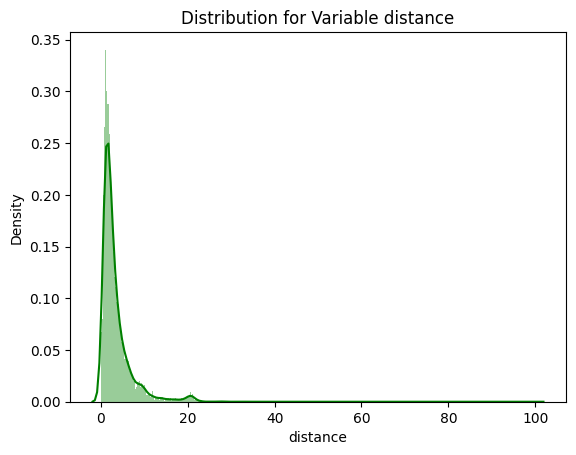

In [85]:
sns.distplot(test['distance'],bins='auto',color='green')
plt.title("Distribution for Variable "+i)
plt.ylabel("Density")
plt.show()

In [86]:
test['distance'] = np.log1p(test['distance'])

<ipython-input-87-866023d0f931>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(test['distance'],bins='auto',color='green')


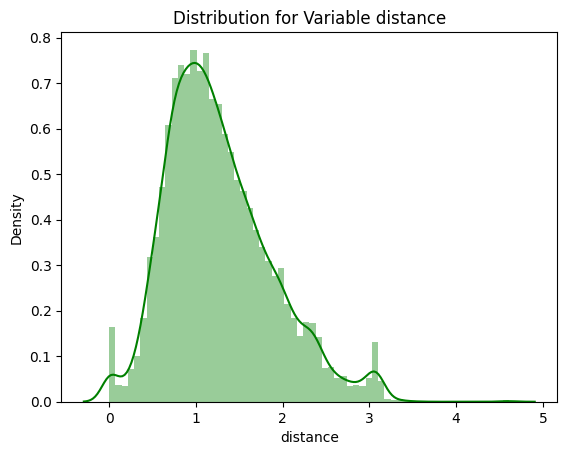

In [87]:
sns.distplot(test['distance'],bins='auto',color='green')
plt.title("Distribution for Variable "+i)
plt.ylabel("Density")
plt.show()

In [88]:
x_train, x_test, y_train, y_test = train_test_split( train.iloc[:, train.columns != 'fare_amount'],
                         train.iloc[:, 0], test_size = 0.20, random_state = 1)

In [89]:
print(x_train.shape)
print(x_test.shape)

(12382, 7)
(3096, 7)


In [90]:
model = LinearRegression().fit(x_train , y_train)

In [91]:
pred_train_LR = model.predict(x_train)

In [92]:
pred_test_LR= model.predict(x_test)

In [93]:
RMSE_train_LR= np.sqrt(mean_squared_error(y_train, pred_train_LR))

In [94]:
RMSE_test_LR= np.sqrt(mean_squared_error(y_test, pred_test_LR))

In [95]:
print("Root Mean Squared Error for Train data = "+str(RMSE_train_LR))
print("Root Mean Squared Error for Test data = "+str(RMSE_test_LR))


Root Mean Squared Error for Train data = 0.08004685497362408
Root Mean Squared Error for Test data = 0.08269591599539856


In [96]:
from sklearn.metrics import r2_score

r2_score(y_train, pred_train_LR)

0.735891841818263

In [97]:
r2_score(y_test, pred_test_LR)

0.7196813919801777

In [98]:
DT_MODEL = DecisionTreeRegressor(max_depth = 2).fit(x_train,y_train)

In [99]:
# Prediction on train data

pred_train_DT = DT_MODEL.predict(x_train)



# Prediction on test data

pred_test_DT = DT_MODEL.predict(x_test)

In [100]:
# Calculating RMSE for train data

RMSE_train_DT = np.sqrt(mean_squared_error(y_train, pred_train_DT))



# Calculating RMSE for test data

RMSE_test_DT = np.sqrt(mean_squared_error(y_test, pred_test_DT))

In [101]:
print("Root Mean Squared Error for Train data = "+str(RMSE_train_DT))
print("Root Mean Squared Error for Test data = "+str(RMSE_test_DT))

Root Mean Squared Error for Train data = 0.08537260912504774
Root Mean Squared Error for Test data = 0.08933297359945115


In [102]:
r2_score(y_train, pred_train_DT)

0.699578936757697

In [103]:
r2_score(y_test, pred_test_DT)

0.6728797837607222

In [104]:
RF_MODEL = RandomForestRegressor(n_estimators = 200).fit(x_train,y_train)

In [105]:
# Prediction on train data

pred_train_RF = RF_MODEL.predict(x_train)

# Prediction on test data

pred_test_RF = RF_MODEL.predict(x_test)

In [106]:
# Calculating RMSE for train data

RMSE_train_RF = np.sqrt(mean_squared_error(y_train, pred_train_RF))

# Calculating RMSE for test data

RMSE_test_RF = np.sqrt(mean_squared_error(y_test, pred_test_RF))

In [107]:
print("Root Mean Squared Error for Train data = "+str(RMSE_train_RF))
print("Root Mean Squared Error for Test data = "+str(RMSE_test_RF))

Root Mean Squared Error for Train data = 0.027036911262076618
Root Mean Squared Error for Test data = 0.07666391330537124


In [108]:
r2_score(y_train, pred_train_RF)

0.9698694248806945

In [109]:
r2_score(y_test, pred_test_RF)

0.759083929036216

In [110]:
GB_MODEL = GradientBoostingRegressor().fit(x_train, y_train)

In [111]:
# Prediction on train data

pred_train_GB = GB_MODEL.predict(x_train)



# Prediction on test data

pred_test_GB = GB_MODEL.predict(x_test)

In [112]:
# RMSE for train data

RMSE_train_GB = np.sqrt(mean_squared_error(y_train, pred_train_GB))


# RMSE for test data

RMSE_test_GB = np.sqrt(mean_squared_error(y_test, pred_test_GB))

In [113]:
print("Root Mean Squared Error for Train data = "+str(RMSE_train_GB))
print("Root Mean Squared Error for Test data = "+str(RMSE_test_GB))

Root Mean Squared Error for Train data = 0.06522247441723458
Root Mean Squared Error for Test data = 0.0747394610240186


In [114]:
# Calculate R_square for train data

r2_score(y_train, pred_train_GB)

0.82465725051544

In [115]:
# Calculate R_square for test data

r2_score(y_test, pred_test_GB)

0.7710272885359288

In [116]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 42)
from pprint import pprint

# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [117]:
from sklearn.model_selection import train_test_split,RandomizedSearchCV


# Random Search CV on Random Forest Model

RRF = RandomForestRegressor(random_state = 0)
n_estimator = list(range(1,20,2))
depth = list(range(1,100,2))

In [118]:
# Create the random grid

rand_grid = {'n_estimators': n_estimator,
               'max_depth': depth}

randomcv_rf = RandomizedSearchCV(RRF, param_distributions = rand_grid, n_iter = 5, cv = 5, random_state=0)

randomcv_rf = randomcv_rf.fit(x_train,y_train)
prediction_RRF = randomcv_rf.predict(x_test)

view_best_params_RRF = randomcv_rf.best_params_

best_model = randomcv_rf.best_estimator_

predictions_RRF = best_model.predict(x_test)
# R_square

In [119]:
# R_square

RRF_r2 = r2_score(y_test, predictions_RRF)

In [120]:
# Calculating RMSE

RRF_rmse = np.sqrt(mean_squared_error(y_test,predictions_RRF))

In [121]:
print('Random Search CV Random Forest Regressor Model Performance:')
print('Best Parameters = ',view_best_params_RRF)
print('R-squared = {:0.2}.'.format(RRF_r2))
print('RMSE = ',RRF_rmse)

Random Search CV Random Forest Regressor Model Performance:
Best Parameters =  {'n_estimators': 15, 'max_depth': 9}
R-squared = 0.76.
RMSE =  0.07593769209752399


In [122]:
gb = GradientBoostingRegressor(random_state = 42)
from pprint import pprint

# Look at parameters used by our current forest

print('Parameters currently in use:\n')
pprint(gb.get_params())

Parameters currently in use:

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 42,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}


In [123]:
# Random Search CV on gradient boosting model

gb = GradientBoostingRegressor(random_state = 0)
n_estimator = list(range(1,20,2))
depth = list(range(1,100,2))

In [124]:
# Create the random grid

rand_grid = {'n_estimators': n_estimator,
               'max_depth': depth}

randomcv_gb = RandomizedSearchCV(gb, param_distributions = rand_grid, n_iter = 5, cv = 5, random_state=0)

randomcv_gb = randomcv_gb.fit(x_train,y_train)
predictions_gb = randomcv_gb.predict(x_test)


view_best_params_gb = randomcv_gb.best_params_
best_model = randomcv_gb.best_estimator_

predictions_gb = best_model.predict(x_test)

In [125]:
# R_square

gb_r2 = r2_score(y_test, predictions_gb)


# Calculating RMSE

gb_rmse = np.sqrt(mean_squared_error(y_test,predictions_gb))

In [126]:
print('Random Search CV Gradient Boosting Model Performance:')
print('Best Parameters = ',view_best_params_gb)
print('R-squared = {:0.2}.'.format(gb_r2))
print('RMSE = ', gb_rmse)

Random Search CV Gradient Boosting Model Performance:
Best Parameters =  {'n_estimators': 15, 'max_depth': 9}
R-squared = 0.73.
RMSE =  0.08156262982066434


In [127]:
from sklearn.model_selection import GridSearchCV

# Grid Search CV for random Forest model

regr = RandomForestRegressor(random_state = 0)
n_estimator = list(range(11,20,1))
depth = list(range(5,15,2))

In [128]:
# Create the grid

grid_search = {'n_estimators': n_estimator,
               'max_depth': depth}

In [132]:
# Grid Search Cross-Validation with 5 fold CV

gridcv_rf = GridSearchCV(regr, param_grid = grid_search, cv = 5)

gridcv_rf = gridcv_rf.fit(x_train,y_train)

view_best_params_GRF = gridcv_rf.best_params_

In [133]:
#Apply model on test data

predictions_GRF = gridcv_rf.predict(x_test)

In [134]:
# R_square

GRF_r2 = r2_score(y_test, predictions_GRF)

In [135]:
# Calculating RMSE

GRF_rmse = np.sqrt(mean_squared_error(y_test,predictions_GRF))

In [137]:
print('Grid Search CV Random Forest Regressor Model Performance:')

print('Best Parameters = ',view_best_params_GRF)
print('R-squared = {:0.2}.'.format(GRF_r2))
print('RMSE = ',(GRF_rmse))

Grid Search CV Random Forest Regressor Model Performance:
Best Parameters =  {'max_depth': 7, 'n_estimators': 18}
R-squared = 0.76.
RMSE =  0.07595638945775673


In [138]:
# Grid Search CV for gradinet boosting

gb = GradientBoostingRegressor(random_state = 0)
n_estimator = list(range(11,20,1))
depth = list(range(5,15,2))

In [139]:
# Create the grid

grid_search = {'n_estimators': n_estimator,
               'max_depth': depth}


In [140]:
# Grid Search Cross-Validation with 5 fold CV

gridcv_gb = GridSearchCV(gb, param_grid = grid_search, cv = 5)

gridcv_gb = gridcv_gb.fit(x_train,y_train)
view_best_params_Ggb = gridcv_gb.best_params_

In [141]:
# Apply model on test data

predictions_Ggb = gridcv_gb.predict(x_test)
# R_square

Ggb_r2 = r2_score(y_test, predictions_Ggb)
# Calculating RMSE

Ggb_rmse = np.sqrt(mean_squared_error(y_test,predictions_Ggb))

In [142]:
print('Grid Search CV Gradient Boosting regression Model Performance:')

print('Best Parameters = ',view_best_params_Ggb)
print('R-squared = {:0.2}.'.format(Ggb_r2))
print('RMSE = ',(Ggb_rmse))

Grid Search CV Gradient Boosting regression Model Performance:
Best Parameters =  {'max_depth': 5, 'n_estimators': 19}
R-squared = 0.76.
RMSE =  0.07723780915547007


In [143]:
test.to_csv('test.csv')

In [144]:
from google.colab import files

# Download the file
files.download('test.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [150]:
import shutil
from google.colab import files
# Define your project folder and the ZIP file path
project_folder = '/content/C:\\'  # Replace with your project folder path
zip_file_path = '/content/C:\\.zip'
# Zip the project folder
import shutil
import shutil
shutil.make_archive('/content/C:\\zip', 'zip', 'project_folder')
# Download the ZIP file
from google.colab import files
files.download("/content/C:\\zip.zip")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [155]:
import shutil
from google.colab import files
# Define the folder to be zipped and the path for the zip file
folder_to_zip = r'/C:\Users\Parth\OneDrive\Documents\Power BI Desktop'  # Replace with your project folder path
zip_file_path = r'/C:\Users\Parth\OneDrive\Documents\Power BI Desktop.zip'
# Create a ZIP archive of the folder
shutil.make_archive('/C:\\Users\\Parth\\OneDrive\\Documents\\Power BI Desktop', 'zip', folder_to_zip)
# Download the ZIP file
# files.download(C:\Users\Parth\OneDrive\Documents\Power BI Desktop)
#  The above code has a syntax error.
#  To download files using Google Colab, you would typically use the following:
#  from google.colab import files
#  files.download('/path/to/your/file.zip')
#  Please provide the correct path to the file you want to download.

'/C:\\Users\\Parth\\OneDrive\\Documents\\Power BI Desktop.zip'